In [3]:
#4) extracting (1) token (feature) counts, (2) TF-IDF feature (counts) and finding the dimensionality of the two vector representations.
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

file_path = 'train.json' 
df = pd.read_json(file_path,lines=True)

X = df['Tweet']  

count_vectorizer = CountVectorizer()
X_counts = count_vectorizer.fit_transform(X)

print("Token Count Matrix (first 5 rows):\n", X_counts.toarray()[:5])
print("CountVectorizer dimensionality:", X_counts.shape)

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

print("TF-IDF Matrix (first 5 rows):\n", X_tfidf.toarray()[:5])
print("TfidfVectorizer dimensionality:", X_tfidf.shape)

Token Count Matrix (first 5 rows):
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
CountVectorizer dimensionality: (3000, 9695)
TF-IDF Matrix (first 5 rows):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
TfidfVectorizer dimensionality: (3000, 9695)


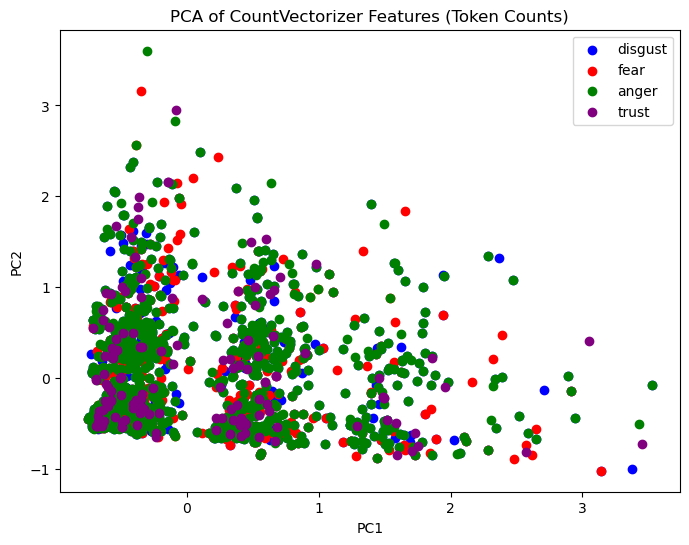

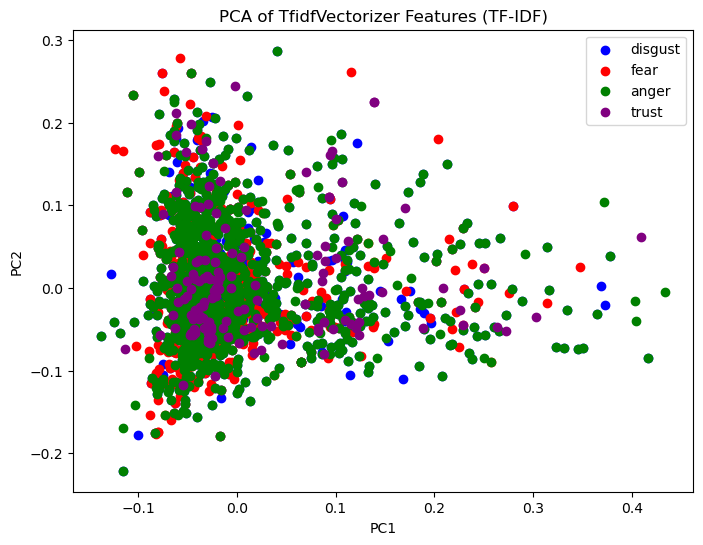

In [4]:
#5) plotting the 2D points

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

file_path = 'train.json'
df = pd.read_json(file_path, lines=True)

selected_classes = ['disgust', 'fear', 'anger', 'trust']
df_filtered = df[df[selected_classes].any(axis=1)]

X = df_filtered['Tweet'] 
y = df_filtered[selected_classes]

count_vectorizer = CountVectorizer()
X_counts = count_vectorizer.fit_transform(X)

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

pca = PCA(n_components=2)
X_counts_pca = pca.fit_transform(X_counts.toarray())
X_tfidf_pca = pca.fit_transform(X_tfidf.toarray())

def plot_2d_points(X_pca, y, title):
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green', 'purple']
    for i, class_label in enumerate(selected_classes):
        plt.scatter(X_pca[y[class_label] == True, 0], X_pca[y[class_label] == True, 1], 
                    label=class_label, color=colors[i])
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

plot_2d_points(X_counts_pca, y, "PCA of CountVectorizer Features (Token Counts)")

plot_2d_points(X_tfidf_pca, y, "PCA of TfidfVectorizer Features (TF-IDF)")